# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

from seaborn import load_dataset

In [11]:
# Carregar o dataset tips
tips = sns.load_dataset('tips')

# Visualizar os primeiros registros
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [27]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct',
       'log_tip_pct', 'log_total_bill'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     31.34
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           5.85e-08
Time:                        14:55:41   Log-Likelihood:                 351.29
No. Observations:                 244   AIC:                            -698.6
Df Residuals:                     242   BIC:                            -691.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2068      0.009     22.975      0.0

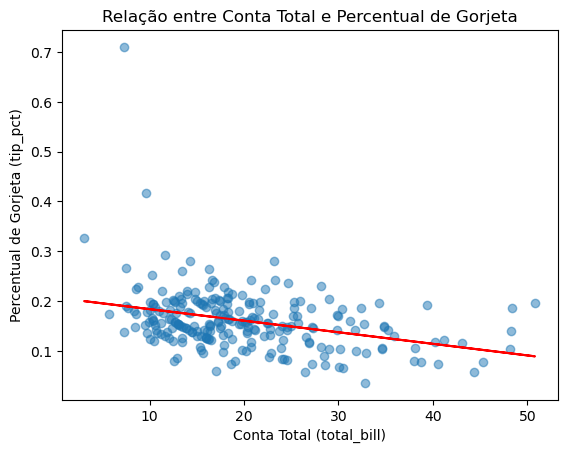

In [12]:
# Criar uma nova coluna para o percentual de gorjetas
tips['tip_pct'] = tips['tip'] / tips['total_bill']

# Ajustando o modelo de regressão
modelo = smf.ols(formula='tip_pct ~ total_bill', data=tips).fit()

# Resumo do modelo
print(modelo.summary())

# Visualizar a relação entre total_bill e tip_pct
plt.scatter(tips['total_bill'], tips['tip_pct'], alpha=0.5)
plt.plot(tips['total_bill'], modelo.predict(), color='red')
plt.xlabel('Conta Total (total_bill)')
plt.ylabel('Percentual de Gorjeta (tip_pct)')
plt.title('Relação entre Conta Total e Percentual de Gorjeta')
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     41.48
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           6.37e-10
Time:                        15:13:47   Log-Likelihood:                 355.73
No. Observations:                 244   AIC:                            -707.5
Df Residuals:                     242   BIC:                            -700.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3146      0

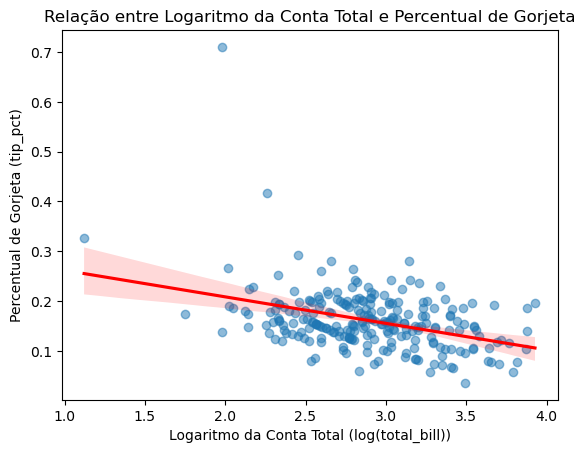

In [24]:
# Ajustar o modelo de regressão usando o logaritmo de total_bill
modelo = smf.ols(formula='tip_pct ~ np.log(total_bill)', data=tips).fit()

# Resumo do modelo
print(modelo.summary())

# Visualizar a relação entre log(total_bill) e tip_pct usando regplot
sns.regplot(x=np.log(tips['total_bill']), y=tips['tip_pct'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Logaritmo da Conta Total (log(total_bill))')
plt.ylabel('Percentual de Gorjeta (tip_pct)')
plt.title('Relação entre Logaritmo da Conta Total e Percentual de Gorjeta')
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     19.65
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           1.24e-08
Time:                        15:20:35   Log-Likelihood:                 354.86
No. Observations:                 244   AIC:                            -703.7
Df Residuals:                     241   BIC:                            -693.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

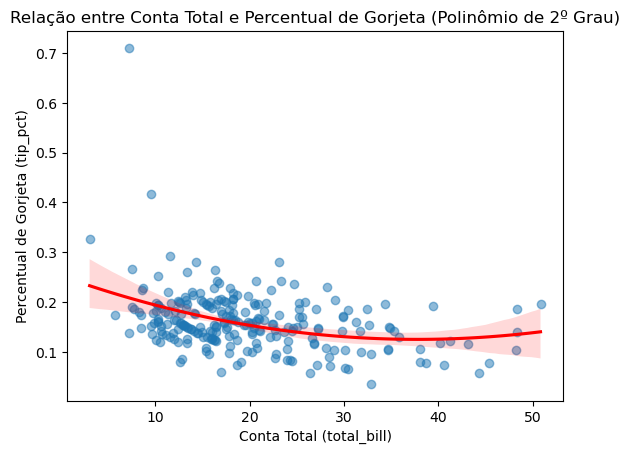

In [26]:
# Ajustar o modelo de regressão usando um polinômio de segundo grau
modelo = smf.ols(formula='tip_pct ~ total_bill + np.power(total_bill,2)', data=tips).fit()

# Resumo do modelo
print(modelo.summary())

# Visualizar a relação entre total_bill e tip_pct usando regplot
sns.regplot(x='total_bill', y='tip_pct', data=tips, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, order=2)
plt.xlabel('Conta Total (total_bill)')
plt.ylabel('Percentual de Gorjeta (tip_pct)')
plt.title('Relação entre Conta Total e Percentual de Gorjeta (Polinômio de 2º Grau)')
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [18]:
# Ajustar o modelo de regressão usando tip_pct
modelo_original = smf.ols(formula='tip_pct ~ total_bill', data=tips).fit()

# Calcular o logaritmo do tip_pct e adicionar ao DataFrame
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# Ajustar o modelo de regressão no log de tip_pct
modelo_log = smf.ols(formula='log_tip_pct ~ total_bill', data=tips).fit()

# Resumo dos modelos
print("Modelo Original:\n", modelo_original.summary())
print("\nModelo no Logaritmo:\n", modelo_log.summary())

# Calcular R² dos dois modelos
r_squared_original = modelo_original.rsquared
r_squared_log = modelo_log.rsquared

print(f"\nR² do modelo original (tip_pct): {r_squared_original:.4f}")
print(f"R² do modelo no logaritmo (log(tip_pct)): {r_squared_log:.4f}")

Modelo Original:
                             OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     31.34
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           5.85e-08
Time:                        14:57:09   Log-Likelihood:                 351.29
No. Observations:                 244   AIC:                            -698.6
Df Residuals:                     242   BIC:                            -691.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2068      0.009  

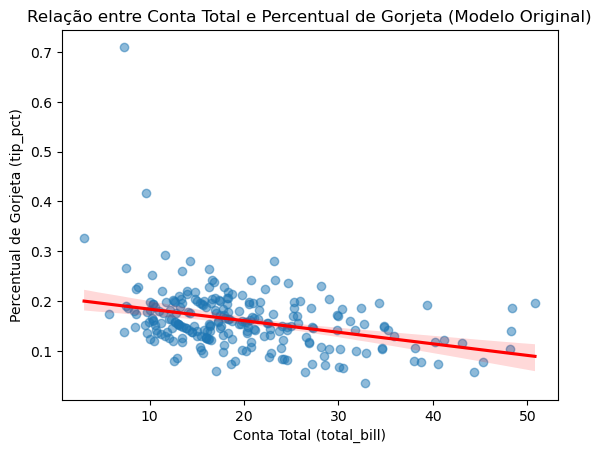

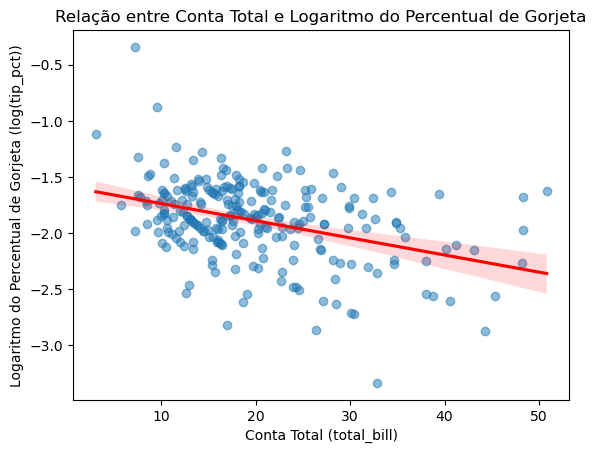

In [19]:
# Visualizar a relação entre total_bill e tip_pct usando regplot
sns.regplot(x='total_bill', y='tip_pct', data=tips, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Conta Total (total_bill)')
plt.ylabel('Percentual de Gorjeta (tip_pct)')
plt.title('Relação entre Conta Total e Percentual de Gorjeta (Modelo Original)')
plt.show()

# Visualizar a relação entre total_bill e log(tip_pct) usando regplot
sns.regplot(x='total_bill', y='log_tip_pct', data=tips, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Conta Total (total_bill)')
plt.ylabel('Logaritmo do Percentual de Gorjeta (log(tip_pct))')
plt.title('Relação entre Conta Total e Logaritmo do Percentual de Gorjeta')
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [21]:
# Calcular o logaritmo do tip_pct e adicionar ao DataFrame
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# Calcular o logaritmo de total_bill e adicionar ao DataFrame
tips['log_total_bill'] = np.log(tips['total_bill'])

# Ajustar o modelo de regressão no log de tip_pct em função do log de total_bill
modelo_log = smf.ols(formula='log_tip_pct ~ log_total_bill', data=tips).fit()

# Resumo dos modelos
print("Modelo Original:\n", modelo_original.summary())
print("\nModelo no Logaritmo:\n", modelo_log.summary())

# Calcular R² dos dois modelos
r_squared_original = modelo_original.rsquared
r_squared_log = modelo_log.rsquared

print(f"\nR² do modelo original (tip_pct): {r_squared_original:.4f}")
print(f"R² do modelo no logaritmo (log(tip_pct) ~ log(total_bill)): {r_squared_log:.4f}")

Modelo Original:
                             OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     31.34
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           5.85e-08
Time:                        15:03:23   Log-Likelihood:                 351.29
No. Observations:                 244   AIC:                            -698.6
Df Residuals:                     242   BIC:                            -691.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2068      0.009  

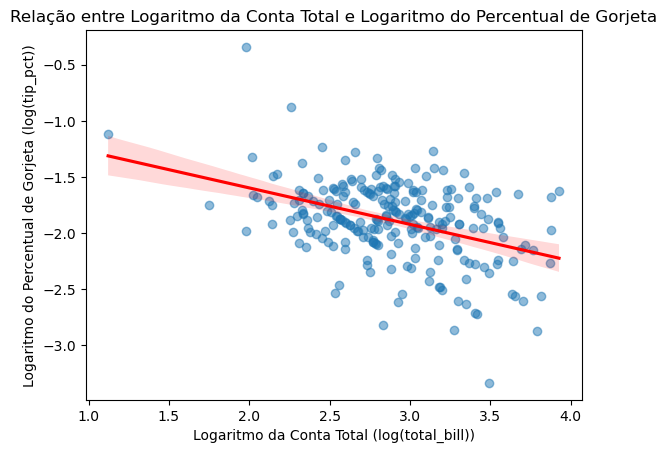

In [22]:
# Visualizar a relação entre log(total_bill) e log(tip_pct) usando regplot
sns.regplot(x='log_total_bill', y='log_tip_pct', data=tips, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Logaritmo da Conta Total (log(total_bill))')
plt.ylabel('Logaritmo do Percentual de Gorjeta (log(tip_pct))')
plt.title('Relação entre Logaritmo da Conta Total e Logaritmo do Percentual de Gorjeta')
plt.show()

###  6. qual modelo resultou no melhor ajuste?

In [ ]:
Ambos os modelos os ajustes foram insignificante e o R²s não explica nenhuma variabilidade dos dados.